In [2]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

In [559]:
data = pd.read_json('data/BDD_14_10_2019.json',lines=True,encoding='utf-8')
df = data.loc[data['Salaire']!='None',:]
df = df.loc[df['Descriptif_du_poste']!="None",:]
# df['Salaire']=df['Salaire'].apply(parse_salary)
df=df.loc[df['Salaire'].apply(lambda x: ('mois' in x) or ('par an' in x)),:]
# freelance = par_jour.loc[par_jour['Titre'].apply(lambda x : 'freelance' not in x.lower()),:]
par_jour.shape


(100, 10)

In [537]:
par_jour

,_id,Titre,Entreprise,Ville,Salaire,Type_de_contrat,Descriptif_du_poste,Date_de_publication,Scrapped_job,Scrapped_location
42,{'$oid': '5d9b73cdac24ca882fb2d2a4'},Data Analyst confirmé (H/F) - Nantes / Freelance,INFOTEL CONSEIL,Nantes (44),420 € par semaine,"Temps plein, Freelance / Indépendant",Acteur européen de la transformation numérique...,il y a 30+ jours,data analyst,Nantes
214,{'$oid': '5d9b7482ac24ca882fb2d350'},Développeur Font End - Freelance H/F,IFEO,France,300 € - 500 € par jour,None,Nous recherchons pour l'un de nos clients gran...,il y a 3 jours,developpeur,Nantes
226,{'$oid': '5d9b748bac24ca882fb2d35c'},Développeur JAVA - REF K - Freelance H/F,TEAM CONSULTING SARL,Nantes (44),300 € - 500 € par jour,None,"Pour un de nos clients grand-comptes, nous rec...",il y a 3 jours,developpeur,Nantes
228,{'$oid': '5d9b748cac24ca882fb2d35e'},Développeur(se) .NET,EXPERTIME,Nantes (44),400 € par jour,None,Intégré(e) au sein de notre agence de Nantes (...,il y a 3 jours,developpeur,Nantes
229,{'$oid': '5d9b7491ac24ca882fb2d35f'},Développeur Java - REF AP - Freelance H/F,TEAM CONSULTING SARL,Nantes (44),300 € - 500 € par jour,None,"Pour un de nos clients grand-comptes, nous rec...",il y a 3 jours,developpeur,Nantes
...,...,...,...,...,...,...,...,...,...,...
12483,{'$oid': '5da34e72ac93ad11eb4e2a19'},Votre Prochaine Mission React Native / Freelance,SKILLWISE,Paris (75),500 € par jour,"Temps plein, Freelance / Indépendant",Je recherche pour un de mes clients un dévelop...,il y a 6 mois,developpeur,Paris
12568,{'$oid': '5da34f60ac93ad11eb4e2a6e'},Stage développeur(se) Java,Mirakl,Paris (75),1 200 € - 1 400 € par semaine,"Intérim, Stage",Mirakl est le leader de l'économie de platefor...,il y a 5 jours,developpeur,Paris
12810,{'$oid': '5da352d4ac93ad11eb4e2b60'},Développeur PHP / Freelance,OZITEM,Aubervilliers (93),400 € par semaine,"Temps plein, Freelance / Indépendant",PAS DE SOUS-TRAITANCE SVP !! Merci pour votre ...,il y a 30+ jours,developpeur,Paris
12817,{'$oid': '5da352fcac93ad11eb4e2b67'},Concepteur Développeur Front-end / Freelance,Thiveo,Paris (75),475 € par semaine,"Temps plein, Freelance / Indépendant",L’un de nos clients dans le secteur Bancaire r...,il y a 30+ jours,developpeur,Paris


In [6]:
path = get_tmpfile("word2vec.model")

In [89]:
descriptions = df['Descriptif_du_poste']
descriptions

0        #JobAlert #Stats #DataScientist #Nantes #Mérie...
4        KANDY, basée à Treillières, près de Nantes (44...
5        A compétences égales, le poste est ouvert aux ...
11       #JobAlert #Stats #DataScientist #Nantes #Mérie...
13       A compétences égales, le poste est ouvert aux ...
                               ...                        
13149    02 Sep Ingénieur développeur en Finance de Mar...
13167    SILERON est un cabinet de conseil internationa...
13202    AMOA Editique/Reporting/BI Editique / Demat / ...
13204    Description du poste\nDescription du poste\n[F...
13264    Notre entreprise est une start-up récemment cr...
Name: Descriptif_du_poste, Length: 2249, dtype: object

In [90]:
titres = df['Titre']
titres

0        Data Scientist H/F - BIOFORTIS - CDI - Saint-H...
4                                       Data Scientist H/F
5                             Ingénieur Data Scientist H/F
11       Data Scientist H/F - BIOFORTIS - CDI - Saint-H...
13                            Ingénieur Data Scientist H/F
                               ...                        
13149     Ingénieur développeur en Finance de Marché (CDI)
13167                       CDI - Consultant SAP Cloud F/H
13202               AMOA Editique/Reporting/BI / Freelance
13204    Analyste Marketing / Marché Junior parlant all...
13264    Stage - Analyste en intelligence économique et...
Name: Titre, Length: 2249, dtype: object

In [92]:
forbid_car= '\'\"\n#*$/:_+[]{}.!?,;()»«|\\'
test_string = 'efez[]{}.f5zr.fer*g$h/j:_k_l-m+[d]f{g}.h!j?k(l)m\q*/'
def clean_char(text):
    string=text
    for char in forbid_car:
        string=string.replace(char,' ')
        string=string.replace(char,' ')
        string=string.replace(char,' ')
    for i in range(2,10):
        string=string.replace(' '*(11-i),' ')
    if string[len(string)-1]==' ':
        string="".join(list(string).pop(len(string)-1))
    return string

print(clean_char(test_string))

# Tokenize

In [560]:
from gensim.utils import tokenize
df["Tokens_titre"] = df.apply(lambda x: list(tokenize(x['Titre'],lowercase=True)), axis=1)
df["Tokens_description"] = df.apply(lambda x: list(tokenize(x['Descriptif_du_poste'],lowercase=True)), axis=1)
df['Cleaned_titre']=[" ".join(txt) for txt in df["Tokens_titre"].values]
df['Cleaned_description']=[" ".join(txt) for txt in df["Tokens_description"].values]

In [176]:
df['Cleaned_description'][0]

'jobalert stats datascientist nantes mérieuxnutrisciences biofortis basée à saint herblain près de nantes est la filiale du groupe merieux nutrisciences depuis présent dans pays et à travers plus de laboratoires merieux nutrisciences fait avancer la science en proposant des solutions pour la qualité et sécurité alimentaire notre vision est en effet d améliorer la santé grâce à des aliments plus sûrs et une nutrition plus saine cette vision se concrétise chaque jour grâce à nos collaborateurs animés par nos valeurs l excellence l intégrité le sens de l initiative et le sens des responsabilités basée à regroupe l ensemble des fonctions support à l activité de nos laboratoires de chimie et de microbiologie par leur expertise scientifique réglementaire et technique merieux nutrisciences fournit aux entreprises nationales et internationales non seulement des prestations de qualité mais surtout des solutions pratiques et adaptées à leurs problématiques biofortis est la cro du groupe dédiée à

In [182]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pierre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
model_titre = Word2Vec(df['Tokens_titre'], size=100, window=5, min_count=5,)
model_titre.save("word2vec.model")

In [167]:
model_titre.train(df['Tokens_titre'], total_examples = df['Tokens_titre'].shape[0], epochs = 80)

(396453, 993840)

In [168]:
len(model_titre.wv.vocab)

257

In [169]:
# Word2vec descriptions
model_description = Word2Vec(df['Tokens_description'], size=100, window=5, min_count=5)
model_description.train(df['Tokens_description'], total_examples = df['Tokens_description'].shape[0], epochs = 80)

(40370254, 55879520)

In [236]:
model_description.wv['data']

array([-1.3383114 ,  1.4297514 ,  2.4247212 ,  0.04053175,  1.1960243 ,
        1.9101195 ,  4.188548  , -5.621346  ,  1.1717074 , -0.9901636 ,
       -0.6035172 , -3.7244966 ,  2.0631065 , -4.702251  ,  4.8205523 ,
       -3.9905045 ,  4.451429  ,  0.56172645,  1.1828699 ,  3.8946612 ,
        0.16858591,  0.7742049 ,  1.9262658 ,  3.1911342 ,  2.6648707 ,
       -0.8790922 ,  0.9047552 ,  2.5040965 , -4.1381407 , -1.8984157 ,
        1.0408055 , -0.14041932,  0.8468319 , -1.9801913 , -3.9862316 ,
        2.2469478 ,  0.04796235,  1.127827  ,  5.19599   , -1.702758  ,
        0.54732037, -1.9436508 , -2.3978875 , -3.8689883 ,  1.6633201 ,
        1.6790653 ,  1.33343   , -1.5478588 ,  2.445562  , -0.2214213 ,
       -0.04549992,  6.2061496 ,  2.0041559 , -0.3034571 ,  0.10620397,
        6.5319014 ,  1.652753  ,  2.842311  , -0.70290524, -0.940383  ,
        0.5272433 , -0.24352346,  0.241607  ,  1.0437937 ,  1.8030908 ,
       -1.5126762 ,  1.311949  ,  1.5443763 ,  2.3844235 , -0.56

In [172]:
model_description.wv.most_similar_cosmul('experience')

[('etudiants', 0.7690250277519226),
 ('profile', 0.7591474652290344),
 ('year', 0.7520941495895386),
 ('least', 0.7510254979133606),
 ('desirable', 0.7475867867469788),
 ('years', 0.7475718259811401),
 ('preferred', 0.7473539113998413),
 ('research', 0.7425826191902161),
 ('ideal', 0.7421649694442749),
 ('required', 0.7381802797317505)]

# Count Vectorizer

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
cvec_titres = CountVectorizer(ngram_range=(1, 2), min_df = .005, max_df=0.8, stop_words=stop_words)
cvec_titres.fit_transform(df["Cleaned_titre"])

<2249x179 sparse matrix of type '<class 'numpy.int64'>'
	with 8815 stored elements in Compressed Sparse Row format>

In [187]:
correl_titre=pd.DataFrame(cvec_titres.transform(titres).todense(),columns=cvec_titres.get_feature_names(),index=df.index)
correl_titre['Salaire']=df['Salaire']
correl_titre

,affaires,analyst,analyste,android,angular,architecte,asp,asp net,assistant,back,...,up,vue,vue js,web,web full,windev,éditeur,études,études développement,Salaire
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40 000 € par an
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30 000 € - 40 000 € par an
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30 000 € - 50 000 € par an
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40 000 € par an
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30 000 € - 50 000 € par an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40 000 € - 60 000 € par an
13167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45 000 € - 55 000 € par an
13202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,400 € par jour
13204,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1 900 € - 2 300 € par mois


In [185]:
import re
def parse_salary(salary):
    
    # Supprime les espaces dans les valeurs de salaires
    
    sal = salary.replace(' ', '')
    
    # PENSER AU NAN
    
    ### if salary == nan
    
    ########### On parse si le salaire est "par an"
    
    if 'par an' in salary:
        if '-' in salary:
            x = re.findall('\d+', sal)
            avg = (int(x[0]) + int(x[1]))/(len(x))
            return avg
        else:
            x = re.findall('\d+', sal)
            return int(x[0])
        
    ########## Sinon on parse si le salaire est "par mois"
    
    elif 'par mois' in salary:
        if '-' in salary:
            x = re.findall('\d+', sal)
            avg = (int(x[0]) + int(x[1]))/(len(x))
            return (avg * 12) 
        else:
            x = re.findall('\d+', sal)
            return (int(x[0]) * 12)
    
    ########## Sinon on parse si le salaire est "par semaine"
    
    elif 'par semaine' in salary:
        if '-' in salary:
            x = re.findall('\d+', sal)
            avg = (int(x[0]) + int(x[1]))/(len(x))
            return (avg * 4 * 12) 
        else:
            x = re.findall('\d+', sal)
            return (int(x[0]) * 4 * 12)
    
    
    ########## Sinon on parse si le salaire est "par jour"
    
    elif 'par jour' in salary:
        if '-' in salary:
            x = re.findall('\d+', sal)
            avg = (int(x[0]) + int(x[1]))/(len(x))
            return (avg * 20 * 12)
        else:
            x = re.findall('\d+', sal)
            return (int(x[0]) * 20 * 12)
    
    ########## Sinon on parse si le salaire est "heure"
    
    elif 'par heure' in salary:
        if '-' in salary:
            x = re.findall('\d+', sal)
            avg = (int(x[0]) + int(x[1]))/(len(x))
            return (avg * 35 * 4 * 12)
        else:
            x = re.findall('\d+', sal)
            return (int(x[0]) * 35 * 4 * 12)

In [186]:
sala_2 = []
for salary in correl_titre['Salaire']:
    #print(salary)
    s = parse_salary(salary)
    sala_2.append(s)
    #sal.append(salaires[salary])

In [188]:
correl_titre['Salaire']=sala_2

correl=correl_titre.corr()['Salaire'].sort_values()

In [189]:
correl.head(20)

stage                      -0.445369
stagiaire                  -0.211509
stage développeur          -0.195402
stage chef                 -0.173784
web                        -0.172046
développeur web            -0.128430
mois                       -0.122130
chef projet                -0.101747
projet                     -0.100331
assistant                  -0.095169
junior                     -0.094335
marketing                  -0.091314
chef                       -0.083918
développeur informatique   -0.069281
technicien                 -0.066784
intégrateur                -0.062652
informatique               -0.062576
start up                   -0.061683
start                      -0.061683
developpeur web            -0.055507
Name: Salaire, dtype: float64

In [190]:
correl.tail(20)

développeur ios           0.061886
développeur javascript    0.062150
secteur                   0.066129
expert                    0.073270
bi                        0.076175
ios                       0.076191
engineer                  0.078066
data scientist            0.080704
scientist                 0.080704
développeur java          0.083265
manager                   0.084054
immobilier                0.102817
directeur                 0.104420
freelance                 0.106588
lead                      0.110254
data                      0.118828
lead data                 0.136468
senior                    0.141390
ref                       0.234351
Salaire                   1.000000
Name: Salaire, dtype: float64

In [191]:
cvec_description = CountVectorizer(ngram_range=(1, 2), min_df = .02, max_df=0.8, stop_words=stop_words) #binary = True on compte pas le nombre d'occurence juste si il est présent
cvec_description.fit_transform(df['Cleaned_description'])
correl_descript=pd.DataFrame(cvec_description.transform(df["Cleaned_description"]).todense(),columns=cvec_description.get_feature_names(), index=df.index)
correl_descript['Salaire']=df['Salaire']
sala_descript = []
for salary in correl_descript['Salaire']:
    #print(salary)
    s = parse_salary(salary)
    sala_descript.append(s)
correl_descript['Salaire']=sala_descript
correl_descript_matrix=correl_descript.corr()
correl2=correl_descript_matrix['Salaire'].sort_values()

In [192]:
correl2.head(20)

stage             -0.386240
mois              -0.343043
salaire mois      -0.338031
stage salaire     -0.312501
emploi stage      -0.303847
mois expérience   -0.248386
type              -0.191787
bac               -0.188337
remboursement     -0.186991
type emploi       -0.180432
alternance        -0.172553
bts               -0.165807
bac bts           -0.164067
emploi            -0.161801
dut               -0.160365
an souhaité       -0.156369
html              -0.154947
dut deug          -0.153818
deug              -0.153722
bts dut           -0.150993
Name: Salaire, dtype: float64

In [193]:
correl2[~correl_descript_matrix['Salaire'].isna()].tail(20)

scientists             0.118183
data scientists        0.119533
backend developer      0.122468
environ ans            0.125455
developer              0.127000
architecture           0.127236
immobilier             0.131545
grand                  0.131832
developer cdi          0.133816
lead                   0.134042
data                   0.136767
capacité travailler    0.147143
si intéressé           0.154346
venir                  0.156888
environ                0.175827
pourquoi venir         0.180854
venir chez             0.181592
paris poste            0.184754
cdi environ            0.191775
Salaire                1.000000
Name: Salaire, dtype: float64

In [194]:
import matplotlib.pyplot as plt

array([  1000.        ,   4966.66666667,   8933.33333333,  12900.        ,
        16866.66666667,  20833.33333333,  24800.        ,  28766.66666667,
        32733.33333333,  36700.        ,  40666.66666667,  44633.33333333,
        48600.        ,  52566.66666667,  56533.33333333,  60500.        ,
        64466.66666667,  68433.33333333,  72400.        ,  76366.66666667,
        80333.33333333,  84300.        ,  88266.66666667,  92233.33333333,
        96200.        , 100166.66666667, 104133.33333333, 108100.        ,
       112066.66666667, 116033.33333333, 120000.        ])

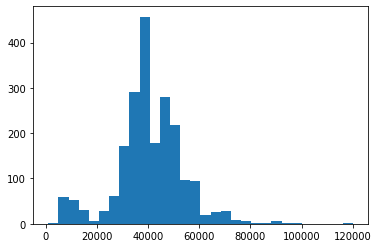

In [562]:
plt.hist(df['Salaire'].apply(parse_salary),30)[1]

In [561]:
df.shape

(2128, 14)

# modèles Titre



In [196]:
#garde les 10+10 = 20 mots dans le titre les plus corrélés au salaire
correl.tail(10).index #noms a garder

Index(['manager', 'immobilier', 'directeur', 'freelance', 'lead', 'data',
       'lead data', 'senior', 'ref', 'Salaire'],
      dtype='object')

In [197]:
df_titre=correl_titre[correl.head(10).index]
df_titre[correl.tail(11).index]=correl_titre[correl.tail(11).index]
df_titre

D:\Miniconda3\envs\machinelearning\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,stage,stagiaire,stage développeur,stage chef,web,développeur web,mois,chef projet,projet,assistant,...,manager,immobilier,directeur,freelance,lead,data,lead data,senior,ref,Salaire
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,40000.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35000.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,40000.0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,40000.0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50000.0
13167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50000.0
13202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,96000.0
13204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25200.0


In [251]:
def salaire_decoupage(salaire,hist):
    for i in range(1,len(hist)):
        if salaire < hist[i]:
            return i
    return len(hist)

def salaire_decoupage2(salaire):
    hist=df_titre['Salaire'].quantile([0,0.33,0.66]).get_values()
#     hist=np.linspace(0, df_titre['Salaire'].max(), num=10)
    for i in range(0,len(hist)-1):
        if salaire < hist[i+1]:
            return i
    return len(hist)-1
        
df_titre['Salaire'].quantile([0,0.33,0.66]).get_values()

D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  from ipykernel import kernelapp as app


array([ 1000., 36500., 45000.])

In [247]:
df_titre['Salaire_decoupage'] = df_titre['Salaire'].apply(salaire_decoupage2)
df_titre['Salaire_decoupage'].value_counts()

D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    857
0    733
1    659
Name: Salaire_decoupage, dtype: int64

In [248]:
X=df_titre.iloc[:,0:20]
y=df_titre[['Salaire_decoupage']].values

# # Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0 )

# Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)

# SVM Gaussian

In [249]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
clf = SVC(kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,clf.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 53   0 128]
 [  5   0 175]
 [ 14   0 188]]
0.4280639431616341
0.4697508896797153


# Random forest 

In [252]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier(criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
y_predict=randomForest.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))

[[ 55   3 123]
 [  7   9 164]
 [ 14   7 181]]
0.4351687388987567
0.4916963226571768


D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Adaboosting

In [253]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)
y_predict=ada.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, ada.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 53   3 125]
 [  7  10 163]
 [ 15   8 179]]
0.42984014209591476
0.4792408066429419


# GBoost

In [254]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoost=GradientBoostingClassifier(random_state=0)
gradientBoost.fit(X_train,y_train)
y_predict=gradientBoost.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 55   3 123]
 [  7   9 164]
 [ 14   7 181]]
0.4351687388987567
0.4905100830367734


# Modele Description

In [255]:
#garde les 10+10 = 20 mots dans le titre les plus corrélés au salaire
df_description=correl_descript[correl2.head(10).index]
df_description[correl2.tail(11).index]=correl_descript[correl2.tail(11).index]
df_description['Salaire_decoupage'] = df_description['Salaire'].apply(salaire_decoupage2)
X=df_description.iloc[:,0:20]
y=df_description[['Salaire_decoupage']].values

# # Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0 )


D:\Miniconda3\envs\machinelearning\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from s


# SVM Gaussian

In [256]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,clf.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 59  59  63]
 [ 16  85  79]
 [ 15  43 144]]
0.5115452930728241
0.5450771055753262


# Random Forest

In [257]:
randomForest=RandomForestClassifier(criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
y_predict=randomForest.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))

[[ 77  62  42]
 [ 29  91  60]
 [ 23  47 132]]
0.5328596802841918
0.6447212336892052


D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# AdaBoosting

In [258]:
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)
y_predict=ada.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 68  57  56]
 [ 23  87  70]
 [ 25  40 137]]
0.5186500888099467


# GBoosting

In [259]:
gradientBoost=GradientBoostingClassifier(random_state=0)
gradientBoost.fit(X_train,y_train)
y_predict=gradientBoost.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 82  51  48]
 [ 38  78  64]
 [ 27  41 134]]
0.522202486678508
0.5877817319098458


# Modeles Titre + Description

In [260]:
#garde les 10+10 = 20 mots dans le titre et la description les plus corrélés au salaire
df_titre_description=df_titre.copy()
df_titre_description[df_description.columns+' description']=df_description[df_description.columns]
df_titre_description.drop(['Salaire_decoupage', 'Salaire'], axis=1, inplace=True)
X=df_titre_description.iloc[:,0:40]
y=df_titre_description[['Salaire_decoupage description']].values

# Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0 )

In [261]:
df_titre_description.columns

Index(['stage', 'stagiaire', 'stage développeur', 'stage chef', 'web',
       'développeur web', 'mois', 'chef projet', 'projet', 'assistant',
       'développeur java', 'manager', 'immobilier', 'directeur', 'freelance',
       'lead', 'data', 'lead data', 'senior', 'ref', 'stage description',
       'mois description', 'salaire mois description',
       'stage salaire description', 'emploi stage description',
       'mois expérience description', 'type description', 'bac description',
       'remboursement description', 'type emploi description',
       'lead description', 'data description',
       'capacité travailler description', 'si intéressé description',
       'venir description', 'environ description',
       'pourquoi venir description', 'venir chez description',
       'paris poste description', 'cdi environ description',
       'Salaire description', 'Salaire_decoupage description'],
      dtype='object')

# SVM Gaussian

In [262]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,clf.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 66  55  60]
 [ 19  83  78]
 [ 13  47 142]]
0.5168738898756661
0.5504151838671412


# Random Forest

In [263]:
randomForest=RandomForestClassifier(criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
y_predict=randomForest.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))

[[ 98  51  32]
 [ 30  86  64]
 [ 32  38 132]]
0.5612788632326821
0.7313167259786477


D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# AdaBoosting

In [264]:
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)
y_predict=ada.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,ada.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 95  45  41]
 [ 34  76  70]
 [ 33  42 127]]
0.5293072824156305
0.5984578884934757


# GBoosting

In [265]:
gradientBoost=GradientBoostingClassifier(random_state=0)
gradientBoost.fit(X_train,y_train)
y_predict=gradientBoost.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 96  41  44]
 [ 28  83  69]
 [ 25  39 138]]
0.5630550621669627
0.6334519572953736


In [270]:
def preprocess_villes(ville):
    #### PARIS ET BANLIEUE DE PARIS ####

    if '75' in ville:
        return 'Paris intra'

    elif ('91' in ville) or ('93' in ville) or ('94' in ville) or ('95' in ville):
        return 'Banlieue de Paris'
    elif ('92' in ville) or ('Hauts-de-Seine' in ville):
        return '92'

    #### LYON ET SA BANLIEUE ####

    elif ('Lyon' in ville):
        return 'Lyon'
        
    elif ('69' in ville) and not('Lyon' in ville):
        return 'Banlieue de Lyon'
        
    #### TOULOUSE ET SA BANLIEUE ####

    elif ('Toulouse' in ville) and ('31' in ville):
        return 'Toulouse'
        
    elif ('31' in ville) or ('Haute-Garonne' in ville) or ('Occitanie' in ville):
        return 'Banlieue de Toulouse'
        
    #### NANTES ET SA BANLIEUE ####

    elif ('Nantes' in ville):
        return 'Nantes'

    elif ('44' in ville) or ('Loire-Atlantique' in ville) or ('Pays de la Loire' in ville):
        return 'Banlieue de Nantes'
        
    #### BORDEAUX ET SA BANLIEUE ####

    elif ('Bordeaux' in ville) and ('33' in ville):
        return 'Bordeaux'
        
    elif ('33' in ville) and not('Bordeaux' in ville):
        return 'Banlieue de Bordeaux'
        
    else:
        return 'A COMPLETER'
        

In [572]:
df['Ville']=df['Ville'].apply(preprocess_villes)

In [579]:
df_ville=pd.get_dummies(df['Ville'], drop_first=True)

In [580]:
df_ville

,A COMPLETER,Banlieue de Bordeaux,Banlieue de Lyon,Banlieue de Nantes,Banlieue de Paris,Banlieue de Toulouse,Bordeaux,Lyon,Nantes,Paris intra,Toulouse
0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
11,0,0,0,1,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13127,0,0,0,0,0,0,0,0,0,1,0
13149,0,0,0,0,0,0,0,0,0,0,0
13167,0,0,0,0,0,0,0,0,0,1,0
13204,0,0,0,0,0,0,0,0,0,1,0


In [274]:
df_titre_description_ville=df_titre_description
df_titre_description_ville['ville : ' + df_ville.columns]=df_ville[df_ville.columns]
df_titre_description_ville

,stage,stagiaire,stage développeur,stage chef,web,développeur web,mois,chef projet,projet,assistant,...,environ description,pourquoi venir description,venir chez description,paris poste description,cdi environ description,Salaire description,Salaire_decoupage description,ville : A COMPLETER,ville : Lyon,ville : Nantes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40000.0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,35000.0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40000.0,1,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40000.0,1,0,0,1
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40000.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50000.0,2,0,0,0
13167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50000.0,2,1,0,0
13202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,96000.0,2,1,0,0
13204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25200.0,0,1,0,0


In [275]:
X=df_titre_description.drop(['Salaire_decoupage description','Salaire description'],axis=1)
y=df_titre_description[['Salaire_decoupage description']].values

# Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0 )

# SVM Gaussian

In [276]:
clf = SVC(kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,clf.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 64  59  58]
 [ 16  83  81]
 [ 11  35 156]]
0.5381882770870338
0.5818505338078291


# Random Forest

In [277]:
randomForest=RandomForestClassifier(criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
y_predict=randomForest.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))

[[116  40  25]
 [ 39  95  46]
 [ 35  26 141]]
0.6252220248667851
0.791814946619217


D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# AdaBoosting

In [278]:
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)
y_predict=ada.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,ada.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 81  70  30]
 [ 21 103  56]
 [ 21  47 134]]
0.5648312611012434
0.6120996441281139


# GradientBoosting

In [279]:
gradientBoost=GradientBoostingClassifier(random_state=0)
gradientBoost.fit(X_train,y_train)
y_predict=gradientBoost.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 99  54  28]
 [ 27 103  50]
 [ 19  37 146]]
0.6181172291296625
0.6814946619217082


# XGBoost 

In [280]:
import xgboost as xgb

In [281]:
# -1 sur les labels pcq xgboost veut des labels entre 0 et 10
y_train_xgb=y_train
y_test_xgb=y_test
dtrain = xgb.DMatrix(X_train,label=y_train_xgb)
dtest = xgb.DMatrix(X_test, label=y_test_xgb)
y_test

array([[2],
       [0],
       [2],
       [1],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
    

In [289]:
# parametres 
param = {'max_depth': 2, 'objective': 'multi:softmax', 'num_class': 3}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [290]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-merror:0.497336	train-merror:0.489917
[1]	eval-merror:0.490231	train-merror:0.453737
[2]	eval-merror:0.490231	train-merror:0.448992
[3]	eval-merror:0.486679	train-merror:0.44484
[4]	eval-merror:0.484902	train-merror:0.442467
[5]	eval-merror:0.479574	train-merror:0.437129
[6]	eval-merror:0.474245	train-merror:0.432384
[7]	eval-merror:0.472469	train-merror:0.428232
[8]	eval-merror:0.474245	train-merror:0.427639
[9]	eval-merror:0.465364	train-merror:0.42586


In [291]:
y_predict = bst.predict(dtest)

In [292]:
print(confusion_matrix(y_test_xgb,y_predict))
print(accuracy_score(y_test_xgb,y_predict))
print(accuracy_score(y_train_xgb, bst.predict(dtrain)))

[[ 57  73  51]
 [  8  96  76]
 [ 15  39 148]]
0.5346358792184724
0.5741399762752076


# TFIDF titre

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_titre = TfidfVectorizer(max_features=100)
X_titre = df["Cleaned_titre"]
tfidf_titre.fit(X_titre)
X_tfidf_titre = tfidf_titre.transform(X_titre)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_titre, y, test_size = 0.25, random_state =0 )

In [300]:
gradientBoost=GradientBoostingClassifier(random_state=0)
gradientBoost.fit(X_train,y_train)
y_predict=gradientBoost.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 99  29  53]
 [ 31  59  90]
 [ 26  22 154]]
0.5541740674955595
0.7052194543297746


In [301]:
randomForest=RandomForestClassifier(criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
y_predict=randomForest.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))

[[130  29  22]
 [ 47  86  47]
 [ 40  36 126]]
0.6074600355239786
0.8196915776986952


D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [302]:
ada=AdaBoostClassifier(random_state=0)
ada.fit(X_train,y_train)
y_predict=ada.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,ada.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 92  22  67]
 [ 34  49  97]
 [ 23  35 144]]
0.5062166962699822
0.599644128113879


# TFIDF description

In [429]:
tfidf_description = TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words, max_features=30, max_df=0.8, min_df=0.02)
X_description = df["Cleaned_description"]
tfidf_description.fit(X_description)
X_tfidf_description = tfidf_description.transform(X_description)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_description, y, test_size = 0.25, random_state =0 )

In [394]:
clf = SVC(kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train,clf.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  0   0 181]
 [  0   0 180]
 [  0   0 202]]
0.35879218472468916
0.3884934756820878


In [395]:
gradientBoost=GradientBoostingClassifier(random_state=0)
gradientBoost.fit(X_train,y_train)
y_predict=gradientBoost.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 94  26  61]
 [ 35  75  70]
 [ 41  20 141]]
0.5506216696269982
0.8813760379596679


In [396]:
randomForest=RandomForestClassifier(criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
y_predict=randomForest.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))

[[117  20  44]
 [ 47  89  44]
 [ 59  27 116]]
0.5719360568383659
0.9899169632265717


D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# GridSearch

In [401]:
from MLIndeed import MLIndeed

test=MLIndeed(X_train, y_train)

In [505]:
params={'SVM' : {'kernel':['rbf'], 'C': [1, 10, 50, 100, 500, 1000], 'gamma':[0.1, 1, 5, 10, 50]},
        'Random Forest': {'n_estimators' :  [10, 50, 100], 'criterion' : ['entropy', 'gini'], 'max_depth' : [5, 10, 50], 'max_features' : ['auto', 5, 10, 20, None]},
        'Ada Boost' : {'n_estimators' :  [10, 50, 100, 200], 'learning_rate' : [0.1, 1, 10]},
        'Gradient Boost' : {'n_estimators' :  [10, 50, 100, 200], 'learning_rate' : [0.01, 0.1, 1], 'max_depth' : [3, 5, 10, 50]}}
params['Gradient Boost']

{'n_estimators': [10, 50, 100, 200],
 'learning_rate': [0.01, 0.1, 1],
 'max_depth': [3, 5, 10, 50]}

In [377]:
svm=test.grid_search_svm(params['SVM'], 'accuracy')

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [378]:
y_predict= svm.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, svm.predict(X_train)))

[[125  17  39]
 [ 28 105  47]
 [ 27  11 164]]
0.6998223801065719
0.9958481613285883


In [388]:
svm.get_params()

{'C': 10,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 10,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [403]:
randomForest = test.grid_search_random_forest(params['Random Forest'], 'accuracy')

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py:514: Dat

ValueError: max_features must be in (0, n_features]

In [405]:
y_predict= randomForest.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))
randomForest.get_params()

[[117  20  44]
 [ 47  89  44]
 [ 59  27 116]]
0.5719360568383659
0.9899169632265717


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [407]:
adaBoost = test.grid_search_adaboost(params['Ada Boost'], 'accuracy')

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [408]:
y_predict= adaBoost.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, adaBoost.predict(X_train)))
adaBoost.get_params()

[[ 70  29  82]
 [ 38  54  88]
 [ 42  20 140]]
0.4689165186500888
0.5575326215895611


{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 0}

In [412]:
gradientBoost = test.grid_search_gboost(params['Gradient Boost'], 'accuracy')

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array 

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was 

ValueError: ExponentialLoss requires 2 classes; got 3 class(es)

In [413]:
y_predict= gradientBoost.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))
gradientBoost.get_params()

[[ 94  26  61]
 [ 35  75  70]
 [ 41  20 141]]
0.5506216696269982
0.8813760379596679


{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# TFIDF correlation salaire

In [564]:
tfidf_description = TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words, max_df=0.8, min_df=0.02)
X_description = df["Cleaned_description"]
tfidf_description.fit(X_description)
sparse_X_tfidf_description = tfidf_description.transform(X_description)
df_X_tfidf_description = pd.DataFrame(sparse_X_tfidf_description.todense(),columns=tfidf_description.get_feature_names(), index=df.index)
df_X_tfidf_description['Salaire']=df['Salaire'].apply(parse_salary).apply(salaire_decoupage_3clusters)
correlation_tfidf_description=df_X_tfidf_description.corr()['Salaire'].sort_values()
correlation_tfidf_description.head(20)

stage             -0.474107
mois              -0.399665
stage salaire     -0.329050
emploi stage      -0.328471
salaire mois      -0.328376
mois expérience   -0.234284
durée             -0.211814
type              -0.204124
type emploi       -0.201797
bac               -0.200802
remboursement     -0.183123
alternance        -0.181846
emploi            -0.176611
an souhaité       -0.174461
bts               -0.170448
dut               -0.162179
bac bts           -0.160033
étude             -0.158325
souhaité          -0.154644
fin               -0.151323
Name: Salaire, dtype: float64

In [565]:
correlation_tfidf_description.tail(20)

data scientists      0.140745
scientists           0.142574
stack                0.142680
pourquoi             0.145713
architecture         0.153392
lead                 0.155542
backend developer    0.159249
responsabilités      0.162017
ans paris            0.162228
developer            0.168732
data                 0.178256
developer cdi        0.179315
environ ans          0.179344
venir                0.202051
environ              0.202336
paris poste          0.202579
venir chez           0.209290
pourquoi venir       0.213070
cdi environ          0.220747
Salaire              1.000000
Name: Salaire, dtype: float64

In [566]:
df_tfifd_description=df_X_tfidf_description[correlation_tfidf_description.head(50).index]
df_tfifd_description[correlation_tfidf_description.tail(51).index]=df_X_tfidf_description[correlation_tfidf_description.tail(51).index]
df_tfifd_description

D:\Miniconda3\envs\machinelearning\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,stage,mois,stage salaire,emploi stage,salaire mois,mois expérience,durée,type,type emploi,bac,...,data,developer cdi,environ ans,venir,environ,paris poste,venir chez,pourquoi venir,cdi environ,Salaire
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.022633,0.025001,0.055607,...,0.102599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.066952,0.0,0.0,0.0,0.0,0.000000,0.019575,0.021623,0.072139,...,0.207047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020734,0.022904,0.025471,...,0.187981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.023862,0.026359,0.058627,...,0.108170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020543,0.022692,0.025235,...,0.186243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,0.078257,0.122644,0.0,0.0,0.0,0.0,0.086928,0.000000,0.000000,0.000000,...,0.379274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13149,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.026896,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
13167,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.033445,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
13204,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [567]:
X_train, X_test, y_train, y_test = train_test_split(df_tfifd_description.iloc[:,0:100], df_tfifd_description.iloc[:,100], test_size = 0.25, random_state =0 )
test=MLIndeed(X_train, y_train)

In [568]:
svm=test.grid_search_svm(params['SVM'], 'accuracy')

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [569]:
y_predict= svm.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, svm.predict(X_train)))

[[ 37   4   4]
 [  3 223  38]
 [  3  64 156]]
0.7819548872180451
0.9404761904761905


In [570]:
randomForest = test.grid_search_random_forest(params['Random Forest'], 'accuracy')
y_predict= randomForest.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, randomForest.predict(X_train)))
randomForest.get_params()

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[ 35   6   4]
 [  1 231  32]
 [  0  50 173]]
0.825187969924812
0.9968671679197995


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [484]:
def salaire_decoupage_quartile(salaire):
    hist=df['Salaire'].apply(parse_salary).quantile([0,0.25,0.50,0.75]).get_values()
#     hist=np.linspace(0, df_titre['Salaire'].max(), num=10)
    for i in range(0,len(hist)-1):
        if salaire < hist[i+1]:
            return i
    return len(hist)-1

In [571]:
gradientBoost = test.grid_search_gboost(params['Gradient Boost'], 'accuracy')
y_predict= gradientBoost.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_train, gradientBoost.predict(X_train)))
gradientBoost.get_params()

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[ 38   4   3]
 [  1 229  34]
 [  1  48 174]]
0.8289473684210527
0.993734335839599


{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [563]:
def salaire_decoupage_3clusters(salaire):
    hist=[0, 16200, 42483]
    for i in range(0,len(hist)-1):
        if salaire < hist[i+1]:
            return i
    return len(hist)-1

In [508]:
df.columns

Index(['_id', 'Titre', 'Entreprise', 'Ville', 'Salaire', 'Type_de_contrat',
       'Descriptif_du_poste', 'Date_de_publication', 'Scrapped_job',
       'Scrapped_location', 'Tokens_titre', 'Tokens_description',
       'Cleaned_titre', 'Cleaned_description'],
      dtype='object')

In [585]:
stop_words.add({'f', 'h', 'ref'})

TypeError: unhashable type: 'set'